In [10]:
import numpy as np
import pandas as pd
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.over_sampling import SMOTENC
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from collections import Counter
random_state = 1234

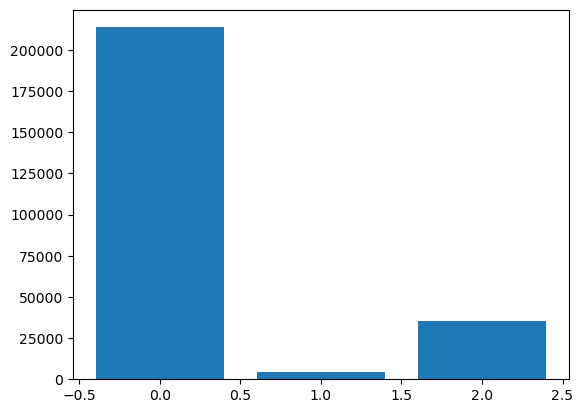

In [9]:
df_diab_012: pd.DataFrame = pd.read_csv("../../data/diabetes_012_health_indicators_BRFSS2015.csv")
df_diab_012_X = df_diab_012.drop("Diabetes_012", axis=1)
df_diab_012_y = df_diab_012["Diabetes_012"]
all_features = set(df_diab_012_X.columns)
numeric_features = ["BMI", "MentHlth", "PhysHlth"]
cat_features = all_features.difference(set(numeric_features))
cat_features_idx = [idx for idx,name in enumerate(df_diab_012_X.columns) if name in cat_features]

train_X, test_X, train_y, test_y = train_test_split(
    df_diab_012_X,
    df_diab_012_y,
    test_size=0.2,
    random_state=random_state,
    shuffle=True,
    stratify=df_diab_012_y,
)

label_counts = list(Counter(df_diab_012["Diabetes_012"]).values())
#relative distribution of the different classes
fig,ax = plt.subplots(1,1)
ax.bar(x=df_diab_012_y.unique(),height = label_counts)
plt.show()

[213703, 35346, 4631]

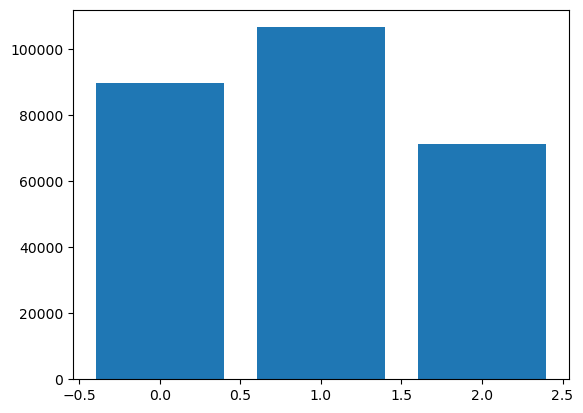

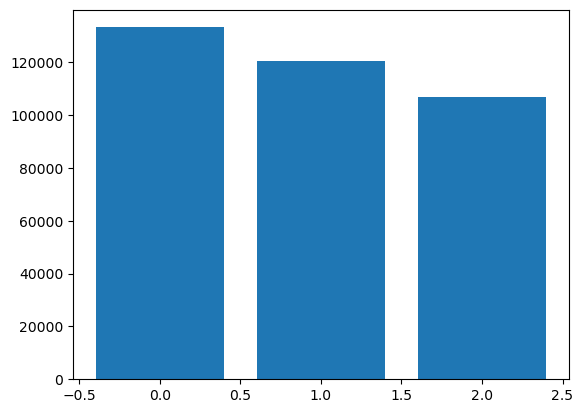

In [15]:
counts = Counter(train_y)
counts[1.0] = int(counts[0.0] * 0.75)
counts[2.0] = int(counts[0.0] * 0.75)
smoteenn = SMOTEENN(
         smote=SMOTENC(categorical_features=cat_features_idx,
                       sampling_strategy=counts),
        enn = EditedNearestNeighbours(sampling_strategy="all", kind_sel="all"),        
         random_state=random_state)

train_X_resamp, train_y_resamp = smoteenn.fit_resample(train_X,train_y)

ounts = Counter(test_y)
counts[1.0] = int(counts[0.0] * 0.75)
counts[2.0] = int(counts[0.0] * 0.75)
smoteenn = SMOTEENN(smote=SMOTENC(categorical_features=cat_features_idx,
                       sampling_strategy=counts),
        enn = EditedNearestNeighbours(sampling_strategy="all", kind_sel="all"),        
         random_state=random_state)

test_X_resamp, test_y_resamp = smoteenn.fit_resample(test_X,test_y)

fig,ax = plt.subplots(1,1)
label_counts = train_y_resamp.groupby(by=lambda idx:train_y_resamp[idx]).count().values
ax.bar(x=train_y_resamp.unique(),height = label_counts)
plt.show()

fig,ax = plt.subplots(1,1)
label_counts = test_y_resamp.groupby(by=lambda idx:test_y_resamp[idx]).count().values
ax.bar(x=test_y_resamp.unique(),height = label_counts)
plt.show()

test_resamp = test_X_resamp.join(test_y_resamp)
test_resamp.to_csv("./diabetes_012_test_resamp.csv",index=False)
train_resamp = train_X_resamp.join(train_y_resamp)
train_resamp.to_csv("./diabetes_012_train_resamp.csv",index=False)


In [16]:
test_orig = test_X.join(test_y)
test_orig.to_csv("./diabetes_012_test_orig.csv",index=False)

In [69]:
majority_count = (train_y == 0.0).shape[0]
smotenc=SMOTENC(categorical_features=cat_features_idx,random_state=random_state,
            sampling_strategy={1.0:int(majority_count * 0.75),2.0: int(majority_count * 0.75)})

train_X_resamp, train_y_resamp = smotenc.fit_resample(train_X,train_y)

majority_count = (test_y == 0.0).shape[0]
smotenc=SMOTENC(categorical_features=cat_features_idx,random_state=random_state,
            sampling_strategy={1.0:int(majority_count * 0.75),2.0: int(majority_count * 0.75)})

test_X_resamp, test_y_resamp = smotenc.fit_resample(test_X,test_y)
fig,ax = plt.subplots(1,1)
label_counts = train_y_resamp.groupby(by=lambda idx:train_y_resamp[idx]).count().values
ax.bar(x=train_y_resamp.unique(),height = label_counts)
plt.show()

fig,ax = plt.subplots(1,1)
label_counts = test_y_resamp.groupby(by=lambda idx:test_y_resamp[idx]).count().values
ax.bar(x=test_y_resamp.unique(),height = label_counts)
plt.show()


test_resamp = test_X_resamp.join(test_y_resamp)
test_resamp.to_csv("./diabetes_012_test_resamp.csv",index=False)
train_resamp = train_X_resamp.join(train_y_resamp)
train_resamp.to_csv("./diabetes_012_train_resamp.csv",index=False)